# EDA on factors affect Heart Attack probability   
**Group 12**  
**2022/11/17**

In this notebook, we are going to perform a explanatory data analysis to the data we have chosen.

$\bullet$ [Link](#Link)  
$\bullet$ [Summary](#Summary)  
$\bullet$ [Introduction](#Introduction)  
$\bullet$ [Data](#Data)  
$\bullet$ [Methods](#Methods)  
$\bullet$ [Results](#Results)  
$\bullet$ [Reference](#Reference)  

### Link

https://github.com/UBC-MDS/group12

## Summary

From the 5 numeric variables and 8 categorical variables in the data, we want to make sure which factor is correlated to the probability of heart attack, which is the target column in the data. By making the correlation table of the variables, we pick the ST depression induced by exercise relative to rest(oldpeak) and maximum heart rate achieved(thalach) as the two factors we are interested.

## Introduction  
Nowadays, heart disease is one of the leading cause of death for people all around the world. In 2019, about 660,000 people in the U.S. die from heart disease(Center for Disease Control and Prevention 2019). Meanwhile, 805,000 people in the U.S. have a heart attack. Note that heart disease is highly related to the probability of heart attack since heart's rhythm and its ability to pump blood to the rest of the body will be influenced after the heart attack, it is beneficial to find the factors that are correlated to increase the heart attack probability.  
Here, we use the explanatory data analysis to take a look at both the numeric and categorical variables which is probably related to the probability of heart attack. It is important since we cannot waste time in making hypothesis testing or prediction on every variable, especially those with nearly zero impact on the probability.  

## Data

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
import pandas as pd
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')
data=pd.read_csv("../data/raw/processed.cleveland.csv",
                names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"],skiprows=1)
data.loc[(data.target != 0),'target']=1
data.loc[(data.ca == "?"),'ca']=np.nan
data.loc[(data.thal == "?"),'thal']=np.nan
data.dropna()
data['ca'] = data['ca'].astype(float)
data['thal'] = data['thal'].astype(float)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


## Methods  
At the very beginning, it is beneficial for us to look at the information of each factor in a table. Then, We take a look at the correlation table of each numeric factor to the target and then choose our numeric factors with relatively high absolute value of correlation. By plotting the histogram of the two factors, we find them have enough counts on every values, which helps us to do hypothesis test or making prediction.  
Then, we can use graphical method to analyze the factor to find whether it is related to the probability of heart attack. From all the plots, we can prove that the two factors we select indeed make a great influence on the heart attack probability and we plot them below.  

In [7]:
data.query("target==0").describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,161.000000,163.000000,164.0
mean,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.273292,3.797546,0.0
std,9.511957,0.497788,0.916620,16.204739,53.456580,0.348303,0.986270,19.199080,0.348303,0.781734,0.594598,0.632333,1.568043,0.0
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.0
25%,44.750000,0.000000,2.000000,120.000000,208.750000,0.000000,0.000000,148.750000,0.000000,0.000000,1.000000,0.000000,3.000000,0.0
50%,52.000000,1.000000,3.000000,130.000000,234.500000,0.000000,0.000000,161.000000,0.000000,0.200000,1.000000,0.000000,3.000000,0.0
75%,59.000000,1.000000,3.000000,140.000000,267.250000,0.000000,2.000000,172.000000,0.000000,1.025000,2.000000,0.000000,3.000000,0.0
max,76.000000,1.000000,4.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000,0.0


In [8]:
data.query("target==1").describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,138.000000,138.000000,139.0
mean,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.137681,5.840580,1.0
std,7.938416,0.385457,0.823680,18.769019,49.486835,0.366317,0.977486,22.593233,0.499609,1.302580,0.563736,1.019460,1.747768,0.0
min,35.000000,0.000000,1.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.0
25%,52.000000,1.000000,4.000000,120.000000,217.500000,0.000000,0.000000,125.000000,0.000000,0.550000,1.000000,0.000000,3.000000,1.0
50%,58.000000,1.000000,4.000000,130.000000,249.000000,0.000000,2.000000,142.000000,1.000000,1.400000,2.000000,1.000000,7.000000,1.0
75%,62.000000,1.000000,4.000000,145.000000,283.500000,0.000000,2.000000,156.500000,1.000000,2.500000,2.000000,2.000000,7.000000,1.0
max,77.000000,1.000000,4.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.0


In [4]:
data[["age","trestbps","chol","thalach","oldpeak","target"]].corr().style.background_gradient()

,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.284946,0.208950,-0.393806,0.203805,0.223120
trestbps,0.284946,1.000000,0.130120,-0.045351,0.189171,0.150825
chol,0.208950,0.130120,1.000000,-0.003432,0.046564,0.085164
thalach,-0.393806,-0.045351,-0.003432,1.000000,-0.343085,-0.417167
oldpeak,0.203805,0.189171,0.046564,-0.343085,1.000000,0.424510
target,0.223120,0.150825,0.085164,-0.417167,0.424510,1.000000


The other variables are all categorical variables.

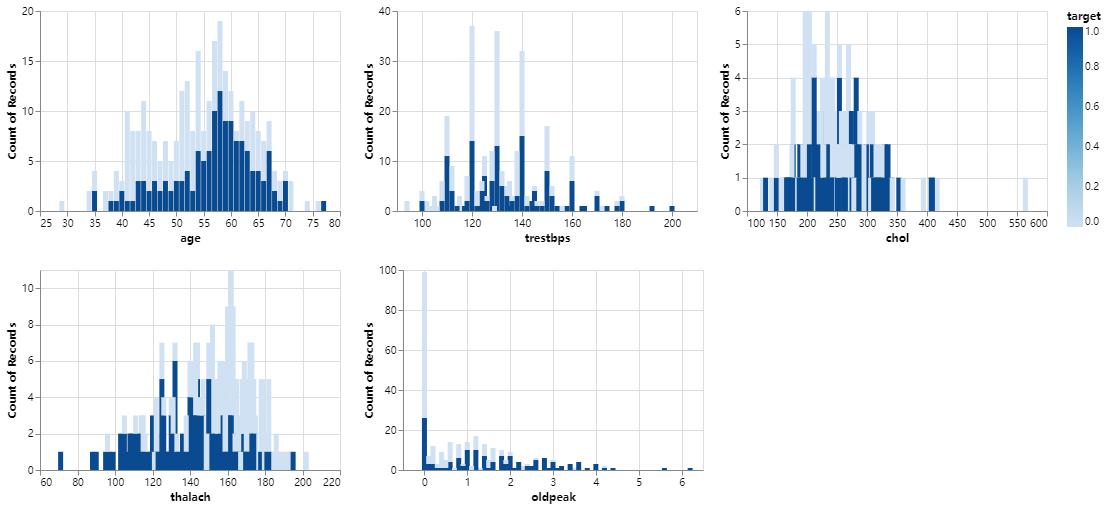

In [43]:
features1 = [
    "age","trestbps","chol"
]
features2 = [
    "thalach","oldpeak"
]
charts1=[]
charts2=[]
for feat in features1:
    charts1.append(alt.Chart(data).mark_bar().encode(
       x=feat,
       y='count()',
       color='target').properties(
    width=300,
    height=200
))
for feat in features2:
    charts2.append(alt.Chart(data).mark_bar().encode(
       x=feat,
       y='count()',
       color='target').properties(
    width=300,
    height=200
))
alt.hconcat(*charts1) & alt.concat(*charts2)

## Results
From the plot above, the higher the maximum heart rate achieved or the ST depression, the greater the probability of heart attack. We can then take a hypothesis test to prove our conclusion.

## Reference  
1. Andras Janosi,William Steinbrunn,Matthias Pfisterer,Robert Detrano.UCI Machine Learning Repository Heart Disease Data Set.  
 https://archive.ics.uci.edu/ml/datasets/Heart+Disease
2. Center for Disease Control and Prevention.2021.Health Topics – Heart Disease and Heart Attack.  
 https://www.cdc.gov/policy/polaris/healthtopics/heartdisease/index.html    
3. Center for Disease Control and Prevention.2021.Heart Attack Symptoms, Risk, and Recovery. 
 https://www.cdc.gov/heartdisease/heart_attack.html    
4. de Jonge, Edwin. 2018. Docopt: Command-Line Interface Specification Language. https://CRAN.R-project.org/package=docopt.